<a href="https://colab.research.google.com/github/Ronit-Desai/IzhikevichNeurons/blob/main/IzhikevichNeurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plotting the Iz neuron and displaying the peaks

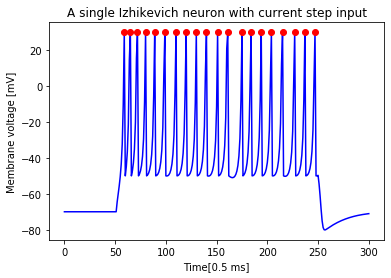

In [ ]:
from pylab import *
from matplotlib.pyplot import *
import numpy as np
from scipy.signal import find_peaks

# Initialize parameters
tmax = 150
dt = 0.5
trange = tmax/dt

# Neuron parameter
a = 0.1
b = 0.2
c = -50
d = 2
 
# Reserve memory

v = array([-70]) #Resting potential
u = array([-14]) #Steady state
peaks = []
 
# For-loop over time.
for t in arange(int(trange)):
    l = 0
    if t*dt > 25 and t*dt < 125: l = 11
    if v[-1] < 30:
        # Update DOE.
        dv = (0.04*np.power(v[-1],2)+5*v[-1]+140-u[-1] + l)
        v = append(v,v[-1]+(dv)*dt)
        du = a*(b*v[-1]-u[-1])
        u = append(u,u[-1] + dt*du)
    else:
        #Spike
        v[-1]=30
        v = append(v,c)
        u = append(u,u[-1] + d)
        
peaks_locations = find_peaks(v,20)
peaks.append(peaks_locations[0])

        
        
        
# Plot voltage trace
figure()
plot(v, 'b', label='Voltage trace')

for peak,maxval in zip(peaks_locations[0],peaks_locations[1]["peak_heights"]):
    plot(peak,maxval, 'ro')


xlabel('Time[0.5 ms]')
ylabel('Membrane voltage [mV]')
title('A single Izhikevich neuron with current step input')
show()

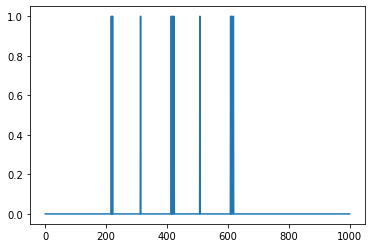

In [ ]:
from pylab import *
from matplotlib.pyplot import *
import numpy as np
from scipy.signal import find_peaks


def population(neurons_v,dt,w,t):
  i1=int(t/dt)
  i2=int((t+w)/dt)
  if(i2<=neurons_v.shape[1]):
    N=neurons_v.shape[0]
    nact=0
    for n in range(0,N):
      nact+=len(find_peaks(neurons_v[n,i1:i2+1])[0])
    return (nact/float(N))/float(w)
  else:
    return 0

# Initialize parameters
tmax = 1000
dt = 0.5
trange = tmax/dt

# Neuron parameter
a = 0.01
b = 0.2
c = -50
d = 2
#number of neurons
N=100
#window size
w=1

neurons_v=[]
neurons_u=[]
# Reserve memory
for i in range(1,N+1):
    v = array([-70]) #Resting potential
    u = array([-14]) #Steady state

  # For-loop over time.
    for t in arange(int(trange)):
        l = 0
        if t*dt > 200 and t*dt < 700: l = 10  #The external current
        if v[-1] < 35:
            # Update DOE.
            dv = (0.04*v[-1]+5)*v[-1]+140-u[-1]
            v = append(v,v[-1]+(dv+l)*dt)
            du = a*(b*v[-1]-u[-1])
            u = append(u,u[-1] + dt*du)
        else:
            #Spike
            v[-1]=35
            v = append(v,c)
            u = append(u,u[-1] + d)

      
    neurons_v.append(v)
    neurons_u.append(u)
    
neurons_v = np.array(neurons_v)
neurons_u = np.array(neurons_u)



pop=[]
for t in arange(0,tmax+1):
  pop.append(population(neurons_v,dt,w,t))

pop=np.array(pop)
plt.plot(arange(0,tmax+1),pop)

In [ ]:
w=100

def shower(w):
  pop=[]
  for t in arange(0,tmax+1):
    pop.append(population(neurons_v,dt,w,t))

  pop=np.array(pop)
  plt.style.use('bmh')
  plt.figure(figsize=(15,10))
  plt.title('Population activation function for dt=%d'%w)
  plt.xlabel('time')
  plt.ylabel('A(t)')
  plt.plot(arange(0,tmax+1),pop)
  plt.savefig('./Activation_functiondt=%d.png'%w)

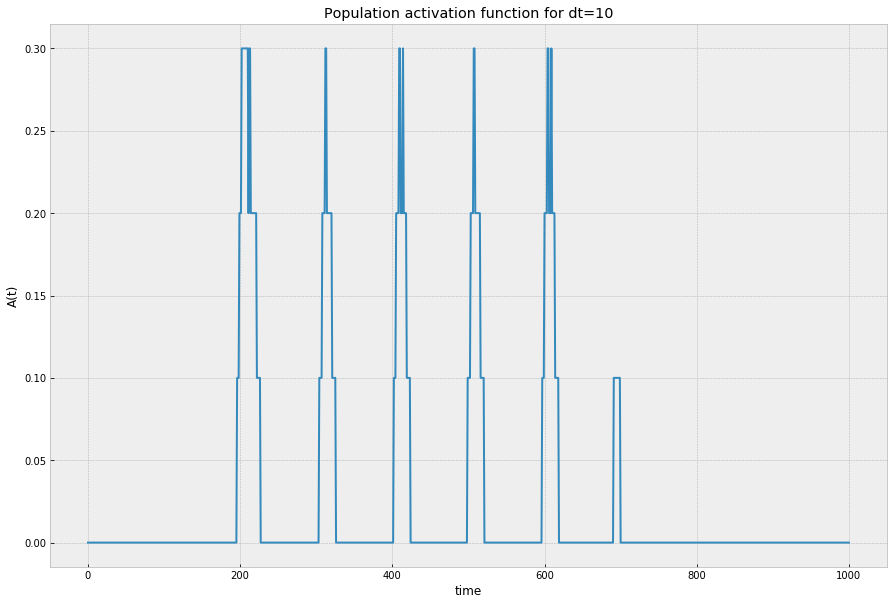

In [ ]:
shower(10)

In [ ]:
import numpy as np
random = np.random.normal(0)

In [ ]:
random

-0.710350891188088